## Kernel Class
**Desctiprion** - This class is designed to estimate a pdf of a given dataset
<ul>
    <li><strong>graph_kernel-</strong>
        <ul>
            <li>input: x_values...1D array of x values to be used for line graph plot</li>
            <li>ourput: y_values...1D array of y values of the kernel function</li>
        </ul>
    </li>
    <li><strong>pdf_kernel-</strong>
        <ul>
            <li>input: x...x value for pdf</li>
            <li>ourput: percentage...p(x)=K(x)</li>
        </ul>
    </li> 
    <li><strong>cdf_kernel-</strong>
        <ul>
            <li>input: x...x value for cdf</li>
            <li>output: percentage...P(x)=$\int_{min(X)}^{x}K(x)dx$</li>
        </ul>
    </li> 
</ul>

In [14]:
import numpy as np
import math

def kernel_function(data,h, x):
    total = 0
    ## Uses Gaussian function for kernel approximation
    for i in range(len(data)):
        total += (pow(2*math.pi,-.5)*pow(math.e,-.5*pow((x-data[i])/h,2)))
    return total/(len(data)*h)

class Kernel:
    def __init__(self, data):
        self.data = data
        self.h = ((4*np.std(self.data)**5)/(3*len(self.data)))**.2

    def graph_kernel(self, x_values):
        l = []
        ## Get p(x) for all x
        for x in x_values:
            l.append(kernel_function(self.data, self.h, x))
        return l
    
    def pdf_kernel(self,x):
        return kernel_function(self.data, self.h, x)
    
    def cdf_kernel(self, x):
        total = 0
        low = min(self.data)
        steps = 1000
        step_size = (abs(low) + abs(x))/steps
        ## integrate over the pdf
        for i in range(steps):
            total+= kernel_function(self.data, self.h, low+step_size*i)*step_size
        return total            

In [29]:
data = np.random.normal(0, 3, 100)
data = np.append(data,np.random.normal(10,2,5000))
data = np.append(data,np.random.normal(-2,2,10000))

approx = Kernel(data)

0.925676743198


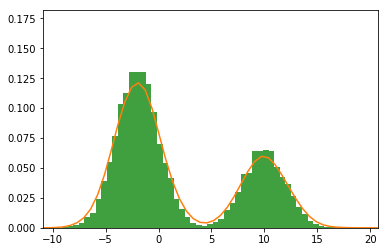

In [30]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(data, 50, density=1, facecolor='g', alpha=0.75)
low = min(data)*1.2
high= max(data)*1.2
x = np.linspace(low,high)
y = approx.graph_kernel(x)
max_percent = max(y)
plt.axis([low, high, 0, 1.5*max_percent])

plt.plot(x, y)
plt.show()

In [28]:
print(approx.cdf_kernel(0))

0.520955633768
